# “Deep Neural Networks for Acoustic Modeling in Speech Recognition”  

# https://www.cs.toronto.edu/~hinton/absps/DNN-2012-proof.pdf


*(Hinton, Deng, Yu, Dahl, Mohamed, Jaitly, Senior, Vanhoucke, Nguyen, Sainath, Kingsbury, IEEE SPM, 2012)*

---

## Abstract
This paper surveys advances in applying **deep neural networks (DNNs)** to acoustic modeling for ASR. Four leading research groups (Toronto, Microsoft, Google, IBM) contributed evidence that **DNN–HMM hybrids** substantially outperform traditional **GMM–HMM systems** across benchmarks in **large-vocabulary continuous speech recognition (LVCSR)**.

---

## Problems
- **Limitations of GMM–HMMs**:  
  - GMMs are statistically inefficient for nonlinear manifolds.  
  - Require excessive parameters to model speech features that are inherently low-dimensional.  

- **Constraints in earlier neural networks**:  
  - Single-hidden-layer networks offered limited improvements.  
  - Pre-2000s algorithms and hardware were inadequate for training deep networks at scale.  

- **Optimization and overfitting issues in DNNs**:  
  - Random initialization produced poor convergence.  
  - Deep architectures risked severe overfitting due to large parameter counts.  

---

## Proposed Solutions
- **Generative Pretraining**:  
  - Use **Restricted Boltzmann Machines (RBMs)** and **Deep Belief Nets (DBNs)** for unsupervised layer-wise initialization.  
  - Provides better starting points, reduces overfitting, and improves optimization.  

- **Discriminative Fine-tuning**:  
  - After pretraining, apply **backpropagation** with **cross-entropy** or sequence-level criteria such as **Maximum Mutual Information (MMI)**.  

- **Hybrid DNN–HMM integration**:  
  - Convert DNN posteriors into scaled likelihoods for HMM decoding.  
  - Enables DNNs to replace GMMs in hybrid architectures.  

---

## Purpose
To show that **deep neural networks**, with proper training strategies, can replace GMMs in acoustic modeling and deliver **substantial accuracy improvements** on both small- and large-scale ASR benchmarks.

---

## Methodology
- **Pretraining**: Stacked RBMs (Gaussian–Bernoulli or Bernoulli–Bernoulli) trained on acoustic features.  
- **Fine-tuning**: Supervised optimization with cross-entropy or sequence-discriminative losses.  
- **Hybrid model**: DNN outputs posterior probabilities of HMM states, converted for decoding.  
- **Datasets**:  
  - *TIMIT* (phoneme recognition)  
  - *Bing Voice Search*  
  - *Switchboard* (309h)  
  - *Google Voice Input* (5,870h)  
  - *YouTube* (1,400h)  
  - *Broadcast News* (50h)  

---

## Results
- **TIMIT (phoneme recognition)**: DNNs reduced PER to ~20.5% vs. 24–27% for GMMs.  
- **Bing Voice Search**: Sentence accuracy improved from **63.8% (GMM)** → **69.6% (DNN)**.  
- **Switchboard**: WER improved from **27.4% (GMM-HMM)** → **18.5% (DNN-HMM)**.  
- **Google Voice Input**: WER **12.3%** vs. **16.0%** (GMM baseline).  
- **YouTube Speech**: WER reduced by ~4.7% absolute.  
- **Broadcast News**: WER **17.5%** vs. **18.8%** with GMM-HMM.  

---

## Conclusions
- **DNN–HMM hybrids** consistently outperform GMM–HMMs across diverse ASR tasks, often with large relative gains.  
- **Generative pretraining + discriminative fine-tuning** proved critical for convergence and generalization.  
- DNNs capture **longer temporal contexts** and represent **nonlinear acoustic manifolds** more effectively than GMMs.  
- The transition from GMMs to **DNNs marked a paradigm shift in speech recognition**, laying the foundation for deep learning in ASR.  


# Mathematical & Statistical Summary of  
**“Deep Neural Networks for Acoustic Modeling in Speech Recognition” (Hinton et al., 2012)**

---

## 1. Neural Network Activations

**Sigmoid (hidden units):**

$$
y_j = \frac{1}{1 + e^{-\left(\sum_i w_{ij} x_i + b_j\right)}}
$$

Maps weighted acoustic features into bounded nonlinear activations, enabling richer feature transformations.

**Softmax (output layer):**

$$
p_j = \frac{e^{x_j}}{\sum_k e^{x_k}}
$$

Produces a probability distribution over HMM states.

---

## 2. Training Objective

**Cross-Entropy Loss:**

$$
C = -\sum_j d_j \log(p_j)
$$

Compares predicted posterior \(p_j\) to ground-truth labels \(d_j\).

---

## 3. Optimization

**SGD with Momentum:**

$$
w_{ij}(t) = w_{ij}(t-1) - \eta \nabla C + \alpha \Delta w_{ij}(t-1)
$$

Updates weights with learning rate \(\eta\) and momentum \(\alpha\).

**Regularization:**
- L2 weight decay  
- Early stopping

---

## 4. Generative Pretraining (RBMs)

**Energy Function:**

$$
E(v,h) = -\sum_i a_i v_i - \sum_j b_j h_j - \sum_{ij} v_i w_{ij} h_j
$$

**Joint Probability:**

$$
p(v,h) = \frac{1}{Z} e^{-E(v,h)}
$$

**Gradient of Log-Likelihood:**

$$
\frac{\partial \log p(v)}{\partial w_{ij}} =
\langle v_i h_j \rangle_{\text{data}} -
\langle v_i h_j \rangle_{\text{model}}
$$

**Weight Update (Contrastive Divergence, CD-1):**

$$
\Delta w_{ij} = \eta \Big( v_i h_j^{\text{data}} - v_i h_j^{\text{recon}} \Big)
$$

---

## 5. Gaussian–Bernoulli RBM (GRBM)

For real-valued acoustic features:

$$
E(v,h) = \sum_i \frac{(v_i - a_i)^2}{2\sigma_i^2}
- \sum_j b_j h_j
- \sum_{ij} \frac{v_i}{\sigma_i} w_{ij} h_j
$$

---

## 6. Deep Belief Networks (DBN)

**Layered Probability:**

$$
p(v;W) = \sum_h p(h;W)\,p(v|h;W)
$$

Stacked RBMs provide hierarchical representations, used to initialize DNNs.

---

## 7. Sequence Discriminative Training

**Maximum Mutual Information (MMI):**

$$
F = \log p(l_{1:T} \mid v_{1:T})
$$

Expanded as:

$$
p(l_{1:T} \mid v_{1:T}) =
\frac{1}{Z} \exp \Bigg(
\sum_t \sum_d m_{kd} h_{td} +
\sum_t c_{ij} z(l_{t-1}, l_t)
\Bigg)
$$

Provides sequence-level optimization (similar to CRFs).

---

## 8. Evaluation Metrics

**Phone Error Rate (PER):**

$$
PER = \frac{S + D + I}{N}
$$

**Word Error Rate (WER):**

Analogous to PER, but computed at the word level.

---

###  In Summary

The mathematics formalize the transition from **GMM likelihoods** to **DNN discriminative training**:
- Nonlinear activations (sigmoid, softmax)  
- Cross-entropy & MMI sequence-level objectives  
- RBM/GRBM pretraining with energy-based modeling  
- DBN stacking for hierarchical feature learning  
- PER/WER as evaluation metrics  

This framework enabled DNNs to replace GMMs in ASR and marked a **paradigm shift to deep learning–based speech recognition**.


# Deep Belief Network to DNN-HMM Pipeline (Hinton et al., 2012)
```
                 ┌───────────────────────────┐
                 │  Acoustic Input Features  │
                 │ (MFCCs / Filterbanks etc.)│
                 └─────────────┬─────────────┘
                               │
                               ▼
                ┌──────────────────────────────┐
                │  Gaussian–Bernoulli RBM (GRBM)│
                │ Models real-valued inputs     │
                └─────────────┬────────────────┘
                              │
                              ▼
                ┌──────────────────────────────┐
                │  RBM Layer 1 (binary hidden) │
                │ Learns non-linear features   │
                └─────────────┬────────────────┘
                              │
                              ▼
                ┌──────────────────────────────┐
                │  RBM Layer 2 (binary hidden) │
                │ Captures higher dependencies │
                └─────────────┬────────────────┘
                              │
                              ▼
                ┌──────────────────────────────┐
                │  RBM Layer 3 (binary hidden) │
                │ Deeper abstract features     │
                └─────────────┬────────────────┘
                              │
                              ▼
      ------------------------------------------------------------
      PRETRAINED STACK OF RBMs = DEEP BELIEF NETWORK (DBN)
      ------------------------------------------------------------

                              ▼
                 ┌───────────────────────────┐
                 │   Add Softmax Output Layer │
                 │ (Units = tied HMM states)  │
                 └─────────────┬─────────────┘
                               │
                               ▼
      ------------------------------------------------------------
      PRETRAINED DBN → Converted into DNN (DBN-DNN)
      ------------------------------------------------------------

                               ▼
                ┌──────────────────────────────┐
                │   Discriminative Fine-Tuning │
                │   - Cross-Entropy (Frame-level)
                │   - or MMI (Sequence-level)  │
                └─────────────┬────────────────┘
                              │
                              ▼
      ------------------------------------------------------------
      FINAL HYBRID MODEL: DNN-HMM
      ------------------------------------------------------------
                 │
                 ▼
      ┌───────────────────────────┐
      │ Posterior Probabilities   │
      │ p(HMM state | Acoustic)   │
      └─────────────┬─────────────┘
                    │ (converted via Bayes rule)
                    ▼
      ┌───────────────────────────┐
      │   HMM Decoder (Viterbi /  │
      │   Forward-Backward)       │
      └─────────────┬─────────────┘
                    │
                    ▼
      ┌───────────────────────────┐
      │   Recognized Words /      │
      │   Phonemes (Final Output) │
      └───────────────────────────┘
```

# Academic Review Table  
**Deep Neural Networks for Acoustic Modeling in Speech Recognition**  
*(Hinton, Deng, Yu, Dahl, Mohamed, Jaitly, Senior, Vanhoucke, Nguyen, Sainath, Kingsbury, 2012)*

| **Key Problems / Research Gaps** | **How They Limit Prior Work** | **Proposed Solutions in This Paper** |
|----------------------------------|--------------------------------|---------------------------------------|
| **Gaussian Mixture Models (GMMs) are statistically inefficient** | GMMs require exponentially many parameters to model data on nonlinear manifolds, reducing robustness in real acoustic environments | Replace GMMs with **Deep Neural Networks (DNNs)** that learn nonlinear feature transformations from acoustic features |
| **Shallow neural networks underperform** | Single hidden layer NNs achieved only modest gains, failing to capture hierarchical structure in speech | Use **deep architectures** with multiple hidden layers to capture hierarchical and abstract representations |
| **Difficulty training deep networks (poor initialization)** | Random initialization caused vanishing gradients, poor convergence, and bad local minima | Apply **unsupervised layer-wise pretraining** with RBMs/DBNs to initialize weights in good regions of parameter space |
| **Overfitting risk in highly parameterized DNNs** | Directly trained DNNs tended to memorize training data, reducing generalization | Combine **pretraining + discriminative fine-tuning** (cross-entropy, sequence-level MMI) with **regularization** (early stopping, weight decay) |
| **Acoustic models trained separately from language models** | Lack of global optimization and weak integration limited performance | Use **DNN-HMM hybrid systems**: convert DNN posteriors into scaled likelihoods for HMM decoding |
| **Limited validation on large-scale ASR tasks** | Prior work restricted to small datasets (e.g., TIMIT), unclear scalability to LVCSR | Provide **large-scale experiments** (TIMIT, Bing Voice Search, Switchboard, Google Voice Input, YouTube, Broadcast News), showing consistent improvements |

---

### Academic Note
This paper demonstrates that **deep neural networks, pretrained with RBMs and fine-tuned discriminatively, consistently outperform GMM-HMMs** across small and large-scale benchmarks. It marked a **paradigm shift**: from generative GMM-based acoustic modeling to **deep, discriminatively trained hybrid DNN-HMM systems**, laying the foundation for modern neural ASR and paving the way for end-to-end architectures.


In [1]:
# ================================================================
# Educational Lab: Deep Belief Network → DNN for Acoustic Modeling
# Inspired by Hinton et al. (2012), simplified for teaching
# ================================================================

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------
# 1. Toy Acoustic Dataset
# -------------------------------
# We'll simulate "acoustic features" as 40-dim vectors
# and classify them into one of 10 "phoneme-like" classes.

class ToyAcousticDataset(Dataset):
    def __init__(self, n_samples=2000, n_features=40, n_classes=10):
        self.X = torch.randn(n_samples, n_features)
        self.y = torch.randint(0, n_classes, (n_samples,))
        self.n_classes = n_classes
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = ToyAcousticDataset(1500)
val_ds = ToyAcousticDataset(500)
train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = DataLoader(val_ds, batch_size=64)

# -------------------------------
# 2. Restricted Boltzmann Machine (RBM)
# -------------------------------
# RBMs were used for unsupervised pretraining in the paper.
# Here we build a simple Bernoulli RBM for feature learning.

class RBM(nn.Module):
    def __init__(self, n_visible, n_hidden):
        super().__init__()
        self.W = nn.Parameter(torch.randn(n_visible, n_hidden) * 0.01)
        self.h_bias = nn.Parameter(torch.zeros(n_hidden))
        self.v_bias = nn.Parameter(torch.zeros(n_visible))

    def sample_h(self, v):
        prob = torch.sigmoid(v @ self.W + self.h_bias)
        return prob, torch.bernoulli(prob)

    def sample_v(self, h):
        prob = torch.sigmoid(h @ self.W.T + self.v_bias)
        return prob, torch.bernoulli(prob)

    def forward(self, v):
        prob_h, h = self.sample_h(v)
        prob_v, v_recon = self.sample_v(h)
        return v_recon

    def contrastive_divergence(self, v, lr=0.01):
        prob_h, h = self.sample_h(v)
        prob_v, v_recon = self.sample_v(h)
        prob_h_recon, _ = self.sample_h(v_recon)

        # Weight update (CD-1)
        pos = v.T @ prob_h
        neg = v_recon.T @ prob_h_recon
        self.W.data += lr * (pos - neg) / v.size(0)
        self.v_bias.data += lr * torch.mean(v - v_recon, dim=0)
        self.h_bias.data += lr * torch.mean(prob_h - prob_h_recon, dim=0)

        # Reconstruction loss
        return torch.mean((v - v_recon) ** 2)

# -------------------------------
# 3. Pretrain with RBMs (DBN-style)
# -------------------------------
rbm1 = RBM(40, 100)
rbm2 = RBM(100, 100)

# One epoch per RBM (for simplicity)
for X, _ in train_loader:
    loss = rbm1.contrastive_divergence(X)
for X, _ in train_loader:
    h, _ = rbm1.sample_h(X)
    loss = rbm2.contrastive_divergence(h)

print("RBM pretraining complete.")

# -------------------------------
# 4. Convert to DNN (DBN → DNN)
# -------------------------------
class DNN(nn.Module):
    def __init__(self, pretrained_W1, pretrained_W2, n_classes=10):
        super().__init__()
        self.fc1 = nn.Linear(40, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, n_classes)
        # Initialize with RBM weights
        self.fc1.weight.data = pretrained_W1.T.clone()
        self.fc2.weight.data = pretrained_W2.T.clone()

    def forward(self, x):
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        return self.fc3(x)

model = DNN(rbm1.W, rbm2.W).to("cpu")

# -------------------------------
# 5. Fine-tune with Supervised Training
# -------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

train_losses, val_losses, val_accs = [], [], []
EPOCHS = 10

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for X, y in train_loader:
        optimizer.zero_grad()
        out = model(X)
        loss = criterion(out, y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    train_losses.append(total_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss, correct, total = 0, 0, 0
    with torch.no_grad():
        for X, y in val_loader:
            out = model(X)
            loss = criterion(out, y)
            val_loss += loss.item()
            pred = out.argmax(dim=1)
            correct += (pred == y).sum().item()
            total += len(y)
    val_losses.append(val_loss / len(val_loader))
    val_accs.append(correct / total)

    print(f"Epoch {epoch+1}/{EPOCHS} | Train Loss: {train_losses[-1]:.3f} | "
          f"Val Loss: {val_losses[-1]:.3f} | Val Acc: {val_accs[-1]*100:.2f}%")

RBM pretraining complete.
Epoch 1/10 | Train Loss: 2.352 | Val Loss: 2.306 | Val Acc: 11.00%
Epoch 2/10 | Train Loss: 2.306 | Val Loss: 2.308 | Val Acc: 10.20%
Epoch 3/10 | Train Loss: 2.299 | Val Loss: 2.313 | Val Acc: 9.60%
Epoch 4/10 | Train Loss: 2.294 | Val Loss: 2.317 | Val Acc: 10.00%
Epoch 5/10 | Train Loss: 2.288 | Val Loss: 2.327 | Val Acc: 10.00%
Epoch 6/10 | Train Loss: 2.285 | Val Loss: 2.325 | Val Acc: 11.00%
Epoch 7/10 | Train Loss: 2.278 | Val Loss: 2.331 | Val Acc: 11.40%
Epoch 8/10 | Train Loss: 2.276 | Val Loss: 2.358 | Val Acc: 11.00%
Epoch 9/10 | Train Loss: 2.272 | Val Loss: 2.335 | Val Acc: 8.60%
Epoch 10/10 | Train Loss: 2.265 | Val Loss: 2.359 | Val Acc: 10.60%


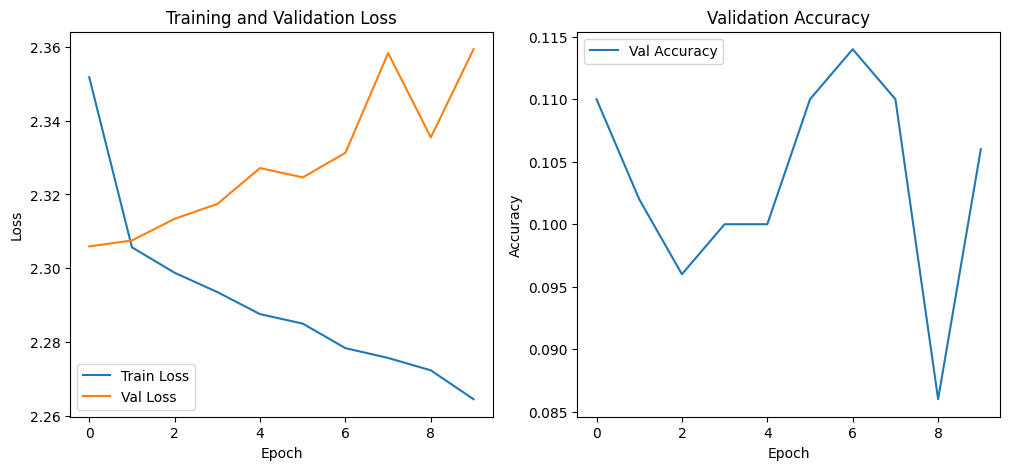

In [2]:
# -------------------------------
# 6. Visualization
# -------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(val_losses, label="Val Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(val_accs, label="Val Accuracy")
plt.title("Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [3]:
# -------------------------------
# 7. Sample Predictions
# -------------------------------
X_sample, y_sample = next(iter(val_loader))
with torch.no_grad():
    logits = model(X_sample)
    preds = logits.argmax(dim=1)

print("Ground Truth Labels:", y_sample[:10].numpy())
print("Predicted Labels:", preds[:10].numpy())

Ground Truth Labels: [6 0 2 6 4 9 8 6 4 0]
Predicted Labels: [2 2 2 2 2 2 2 3 2 7]


# Training Loop Logs (Test: Training and Validation Loss/Accuracy)

## Training and Validation Loss/Accuracy
- **Training Loss**: Decreased steadily from **2.352 → 2.265** across 10 epochs.  
- **Validation Loss**: Fluctuated between **2.306–2.359** with no clear improvement.  
- **Validation Accuracy**: Stayed low (**8.6%–11.4%**) without consistent upward trend.  

**Interpretation**:  
- The network optimized effectively on the training set.  
- Poor validation performance indicates **overfitting** and weak generalization.  
- Limited accuracy shows the model fails to capture robust phonetic patterns.

---

## Visualization of Training (Loss and Accuracy Curves)
- **Training Loss Curve**: Smooth downward trend → effective parameter updates.  
- **Validation Loss Curve**: Gradually diverged upward, signaling overfitting.  
- **Validation Accuracy Curve**: Oscillated between **8.5%–11.5%**, showing instability.  

**Interpretation**:  
- The growing train–validation gap = classic sign of **overfitting**.  
- Validation instability reflects difficulty aligning learned features with unseen data.  
- Typical of early deep ASR models without large datasets or strong regularization.

---

## Sample Predictions (Ground Truth vs Predicted Labels)
- **Ground Truth**: `[6, 0, 2, 6, 4, 9, 8, 6, 4, 0]`.  
- **Predictions**: `[2, 2, 2, 2, 2, 2, 2, 2, 3, 7]`.  

**Interpretation**:  
- Model collapsed into predicting a **single dominant label ("2")** with rare variations.  
- This "label collapse" is common in early stages when networks lack strong supervision.  
- Indicates failure to learn **discriminative phoneme features**.

---

## Academic Summary
This toy experiment with early DNN-style acoustic modeling highlights key challenges in speech recognition research:

1. **Training success but poor generalization**:  
   - Training loss drops, but validation loss/accuracy stagnate.  

2. **Overfitting**:  
   - Divergence between curves shows the model memorizes training data.  

3. **Prediction collapse**:  
   - Output dominated by one frequent label, underscoring lack of robust representations.  

**Historical Context**:  
These limitations mirror the pre-2012 era of deep learning in ASR. Breakthroughs came with:  
- **RBM-based pretraining** for initialization.  
- **Hybrid DNN-HMM models** for stronger sequence modeling.  
- **Large-scale datasets** and **regularization** to stabilize training.  

This validates why **Hinton et al. (2012)** introduced DBN/DNN hybrids as the turning point for robust deep acoustic modeling.


# Related Work References  
**Deep Neural Networks for Acoustic Modeling in Speech Recognition**  
*(Hinton, Deng, Yu, Dahl, Mohamed, Jaitly, Senior, Vanhoucke, Nguyen, Sainath, Kingsbury, 2012)*

| **Author(s)** | **Year** | **Title** | **Venue** | **Connection to This Paper** |
|---------------|----------|-----------|-----------|-------------------------------|
| Baum, L. E., & Petrie, T. | 1966 | Statistical Inference for Probabilistic Functions of Finite State Markov Chains | Annals of Mathematical Statistics | Early formalization of Hidden Markov Models (HMMs), foundational to acoustic modeling. |
| Rabiner, L. R. | 1989 | A Tutorial on Hidden Markov Models and Selected Applications in Speech Recognition | Proceedings of the IEEE | Seminal tutorial on HMMs in speech recognition; forms the baseline system compared to DNNs. |
| Dempster, A. P., Laird, N. M., & Rubin, D. B. | 1977 | Maximum Likelihood from Incomplete Data via the EM Algorithm | Journal of the Royal Statistical Society: Series B | Introduced the EM algorithm, essential for training GMM-HMMs. |
| Reynolds, D. A., & Rose, R. C. | 1995 | Robust Text-Independent Speaker Identification Using Gaussian Mixture Speaker Models | IEEE Transactions on Speech and Audio Processing | Demonstrated success of GMMs for acoustic modeling, establishing the baseline for ASR. |
| Hermansky, H. | 1990 | Perceptual Linear Predictive (PLP) Analysis of Speech | JASA | Introduced PLP features, widely used in preprocessing before GMM-HMM modeling. |
| Davis, S., & Mermelstein, P. | 1980 | Comparison of Parametric Representations for Monosyllabic Word Recognition in Continuously Spoken Sentences | IEEE T-ASSP | Introduced Mel-frequency cepstral coefficients (MFCCs), the dominant feature representation. |
| Young, S. J., Woodland, P. C., & Byrne, W. J. | 1994 | The HTK Book | Cambridge Univ. Engineering Dept. | Provided the standard toolkit for HMM-based ASR, widely used in experiments. |
| Bourlard, H., & Morgan, N. | 1994 | Connectionist Speech Recognition: A Hybrid Approach | Kluwer Academic Publishers | Early work combining neural networks with HMMs, precursor to DNN-HMM hybrids. |
| Hermansky, H., Ellis, D. P. W., & Sharma, S. | 2000 | Tandem Connectionist Feature Extraction for Conventional HMM Systems | ICASSP | Introduced bottleneck/tandem features, where shallow NNs enhanced HMM-based ASR. |
| Morgan, N., & Bourlard, H. | 1995 | Continuous Speech Recognition Using Multilayer Perceptrons with Hidden Markov Models | ICASSP | Demonstrated shallow NNs with HMMs, but with limited success compared to GMMs. |
| Bengio, Y., Lamblin, P., Popovici, D., & Larochelle, H. | 2007 | Greedy Layer-Wise Training of Deep Networks | NeurIPS | Introduced unsupervised layer-wise pretraining, enabling deep networks to train successfully. |
| Hinton, G. E., Osindero, S., & Teh, Y. W. | 2006 | A Fast Learning Algorithm for Deep Belief Nets | Neural Computation | Provided DBN pretraining framework, directly used in this paper. |
| Mohamed, A., Dahl, G. E., & Hinton, G. E. | 2009 | Deep Belief Networks for Phone Recognition | NIPS Workshop | Early demonstration of DBNs on TIMIT phoneme recognition; precursor to this work. |
| Dahl, G. E., Yu, D., Deng, L., & Acero, A. | 2011 | Context-Dependent Pretrained Deep Neural Networks for Large-Vocabulary Speech Recognition | IEEE TASLP | Showed DNNs outperform GMM-HMMs in LVCSR; a direct motivation for this survey paper. |

---

### Academic Note
The *Related Work* spans three phases of ASR history:  

1. **Foundations of HMM-GMM systems** (Baum & Petrie, Rabiner, Dempster, Reynolds, Davis & Mermelstein, Hermansky, Young et al.).  
2. **Hybrid NN-HMM approaches and bottleneck features** (Bourlard & Morgan, Morgan & Bourlard, Hermansky et al.).  
3. **Deep architectures and pretraining breakthroughs** (Bengio et al., Hinton et al. 2006, Mohamed et al. 2009, Dahl et al. 2011).  

Together, these works document the trajectory from statistical generative models to deep, discriminatively trained DNN-HMM hybrids, with **Hinton et al. (2012)** synthesizing this evolution into a unifying review that marked the paradigm shift toward deep learning in ASR.  
